# **Bias**:
Biases are the underlying assumptions that are made by data to simplify the target function. Bias does help us generalize the data better and make the model less sensitive to single data points. It also decreases the training time because of the decrease in complexity of target function High bias suggest that there is more assumption taken on target function. This leads to the underfitting of the model sometimes. Examples of High bias Algorithms include Linear Regression, Logistic Regression etc.

# **Variance:**
In machine learning, Variance is a type of error that occurs due to a model’s sensitivity to small fluctuations in the dataset. The high variance would cause an algorithm to model the outliers/noise in the training set. This is most commonly referred to as overfitting. In this situation, the model basically learns every data point and does not offer good prediction when it tested on a novel dataset. Examples of High variance Algorithms include Decision Tree, KNN etc.

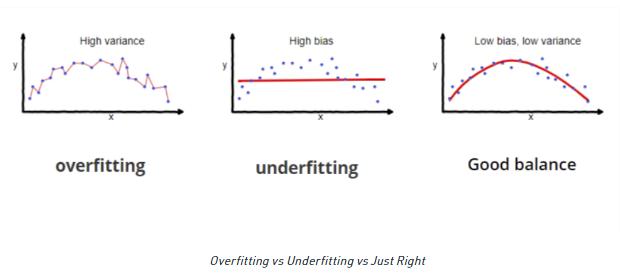

# **Implementation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We are going to use the Boston house prediction dataset. This dataset is present in the datasets module of sklearn (scikit-learn) library. We can import this dataset as follows.

In [ ]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

We can conclude from the above description that we have 13 independent variable and one dependent (House price) variable. Now we need to check for a correlation between independent and dependent variable. We can use scatterplot/corrplot for this.

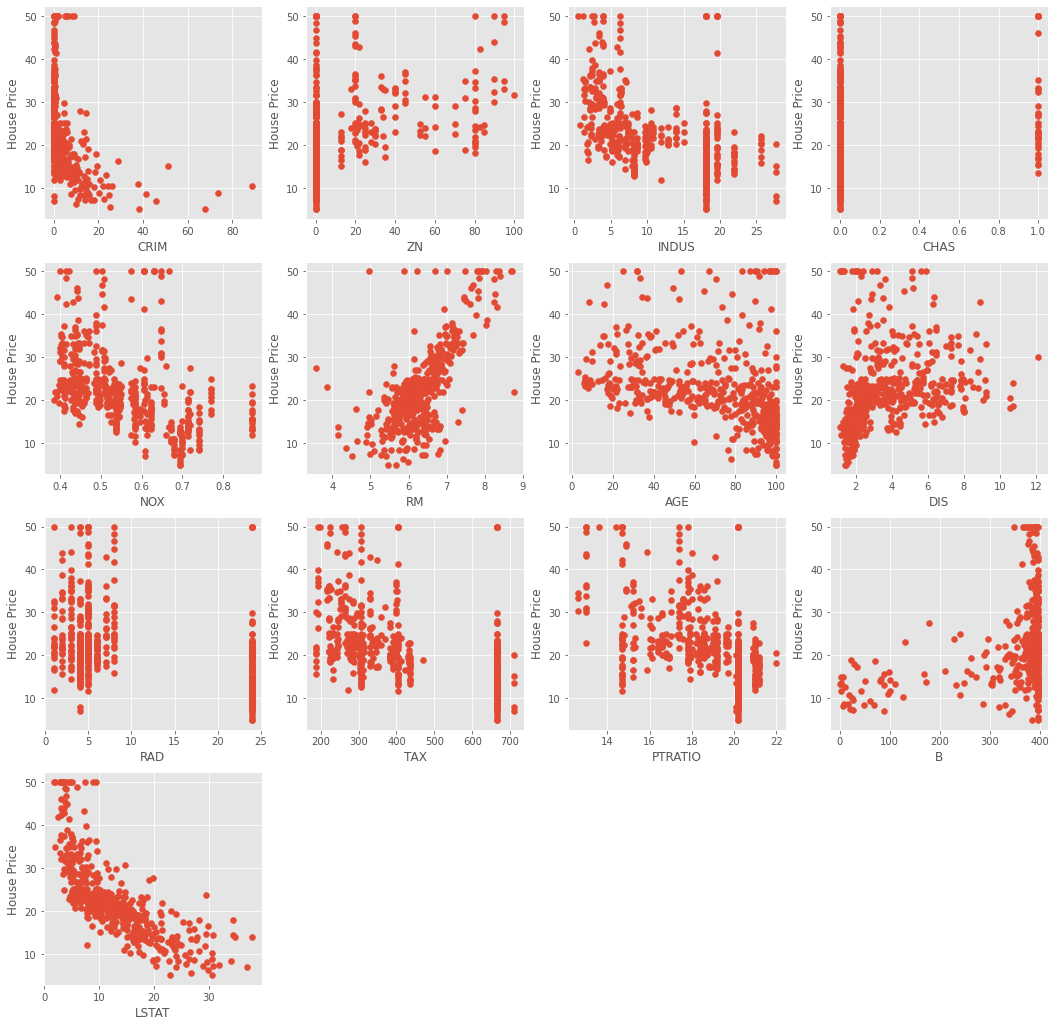

In [ ]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization.

In [ ]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


# **Multiple (Linear) Regression**
Now it’s the right time to test the models. We will be using multiple Linear Regression first. We train the model on training data and calculate the MSE on test.

In [ ]:
 # Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  20.03794243697047
    Columns  Coefficient Estimate
0      CRIM             -0.093300
1        ZN              0.046633
2     INDUS             -0.002578
3      CHAS              2.288815
4       NOX            -15.119353
5        RM              3.344039
6       AGE              0.010563
7       DIS             -1.456231
8       RAD              0.292966
9       TAX             -0.011025
10  PTRATIO             -1.029501
11        B              0.010685
12    LSTAT             -0.609747


Let’s plot a bar chart of above coefficients using matplotlib plotting library.

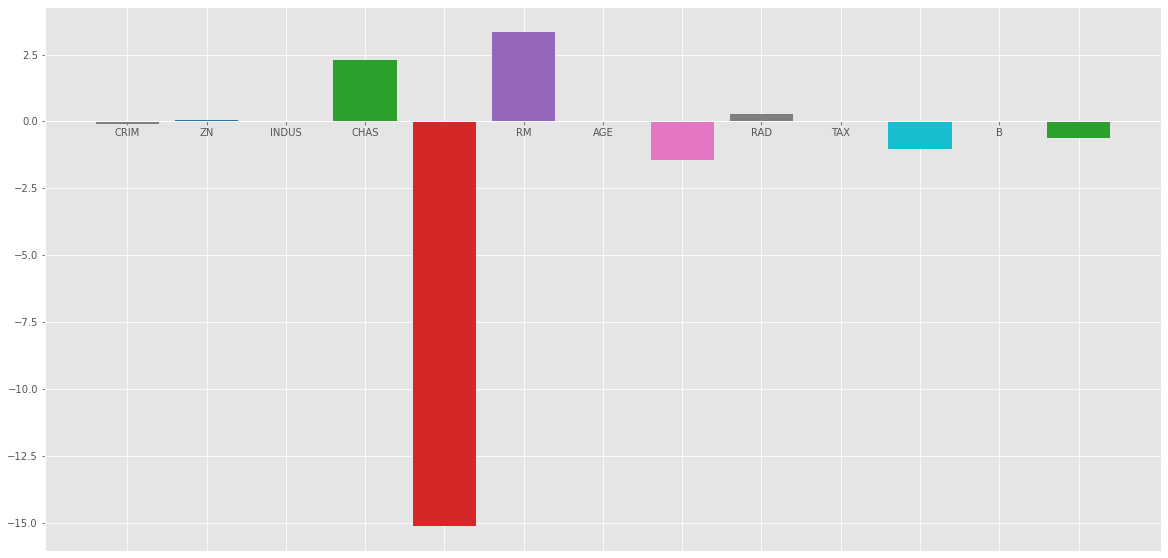

In [150]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables.

# **Ridge Regression:**
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization.

In [151]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

20.710904256531357
    Columns  Coefficient Estimate
0      CRIM             -0.088545
1        ZN              0.047364
2     INDUS             -0.032906
3      CHAS              2.215909
4       NOX             -7.919773
5        RM              3.388613
6       AGE              0.003768
7       DIS             -1.345675
8       RAD              0.273007
9       TAX             -0.011377
10  PTRATIO             -0.953798
11        B              0.011069
12    LSTAT             -0.616693


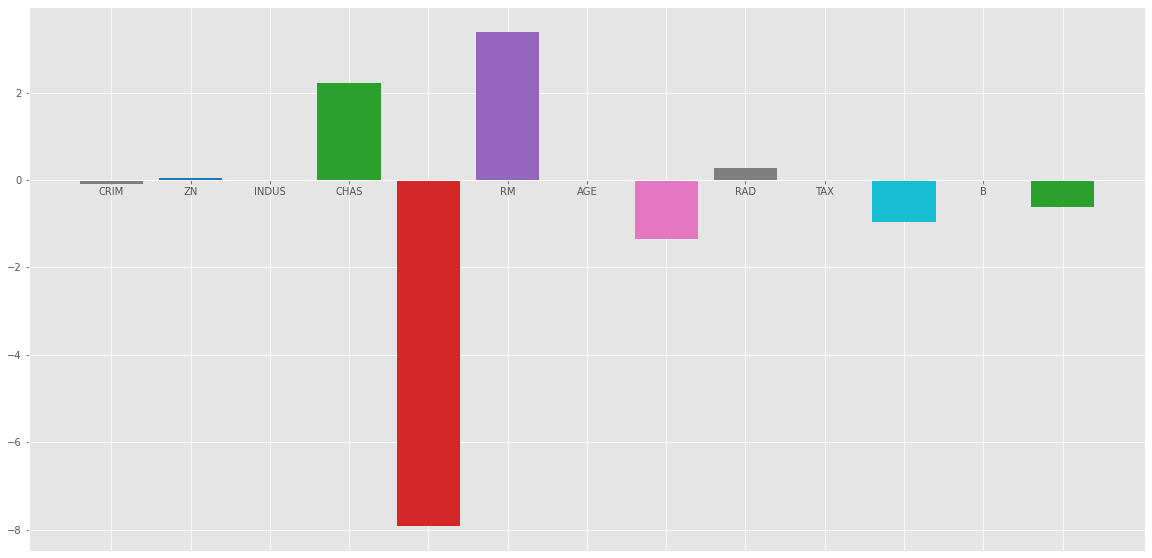

In [152]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [153]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 10)         ###### alpha = 10
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

21.939326819286816
    Columns  Coefficient Estimate
0      CRIM             -0.086260
1        ZN              0.049211
2     INDUS             -0.058603
3      CHAS              1.599440
4       NOX             -1.506251
5        RM              3.196244
6       AGE             -0.000261
7       DIS             -1.246514
8       RAD              0.264611
9       TAX             -0.012093
10  PTRATIO             -0.897242
11        B              0.011349
12    LSTAT             -0.640890


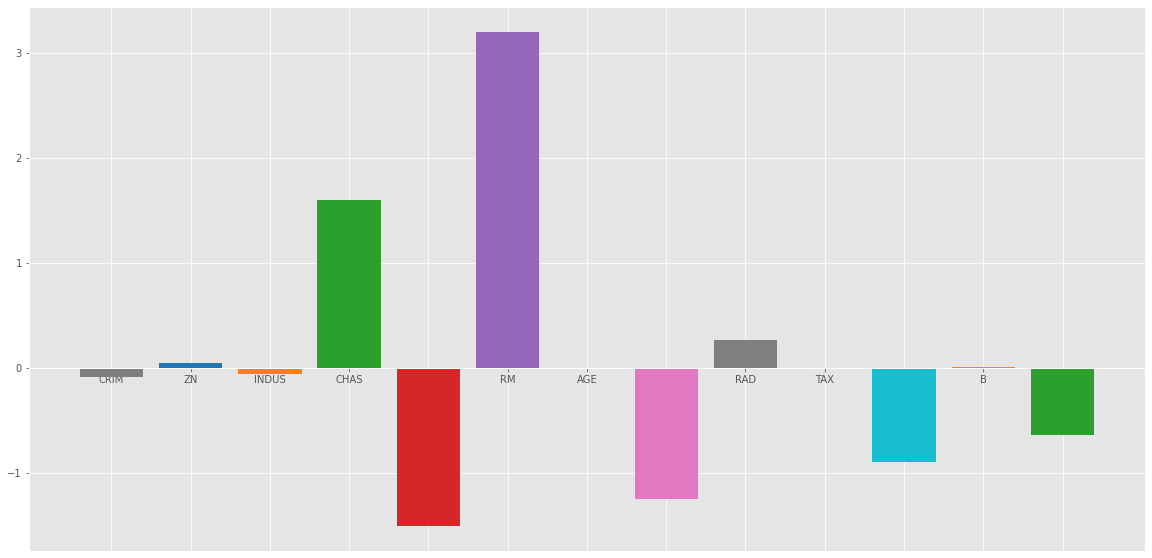

In [154]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

# **Lasso Regression:**
Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.

Code : Python code implementing the Lasso Regression

In [159]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 27.939936201454064
    Columns  Coefficient Estimate
0      CRIM             -0.048317
1        ZN              0.047336
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.595037
6       AGE              0.026198
7       DIS             -0.657321
8       RAD              0.247073
9       TAX             -0.012978
10  PTRATIO             -0.811580
11        B              0.010382
12    LSTAT             -0.830168


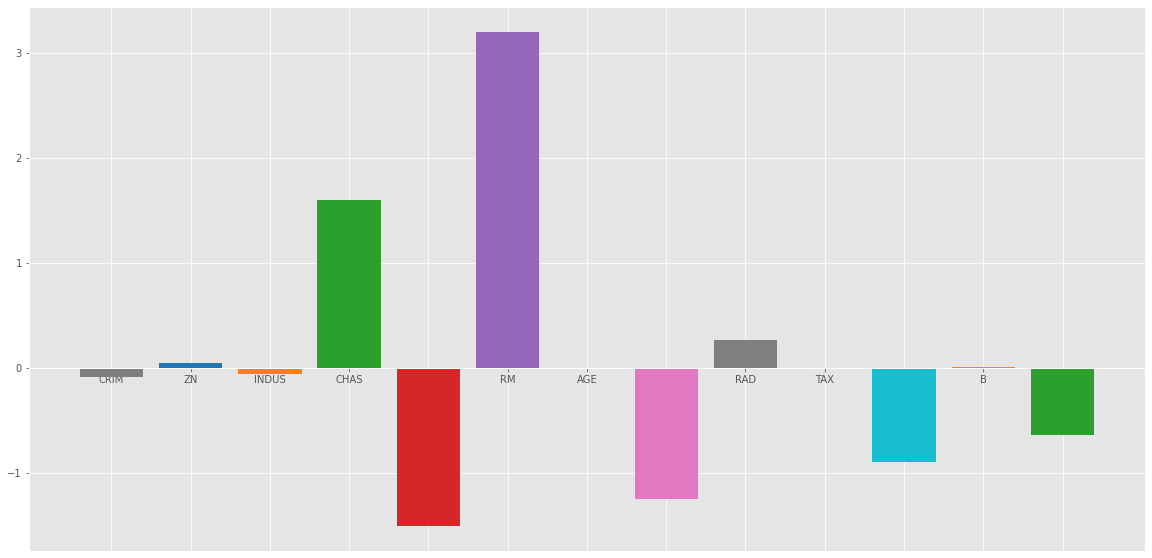

In [160]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [156]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 10)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 37.44884867787057
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.026480
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.007403
10  PTRATIO             -0.000000
11        B              0.009508
12    LSTAT             -0.598031


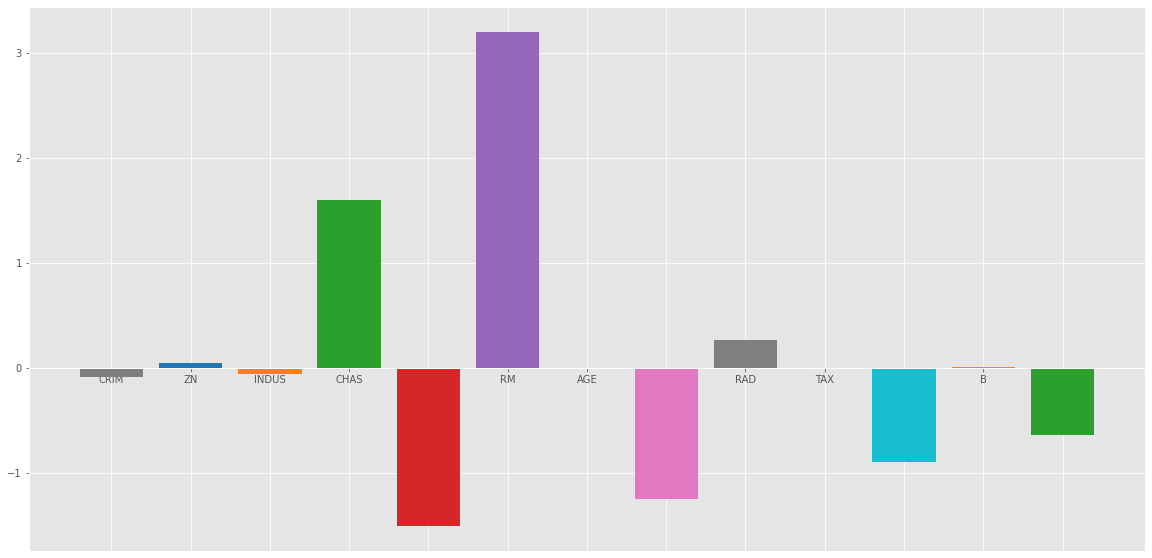

In [158]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

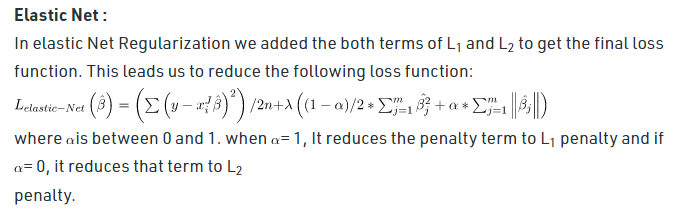

In [161]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 27.01562011699508


,Columns,Coefficient Estimate
0,CRIM,-0.068805
1,ZN,0.050690
2,INDUS,-0.022234
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.809540
6,AGE,0.025026
7,DIS,-0.760328
8,RAD,0.274832
9,TAX,-0.013674


# **Observations:**
* From the above analysis we can reach the following conclusion about different regularization methods:

* Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.

* Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.

* Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.

* Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.

In [ ]:
#finding intercept
print(f"intercept: {lreg.intercept_}")

intercept: 39.09354119930165


#**Evaluation Metrics for Regression Models**

# on test set

In [ ]:
 # Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

In [ ]:
# MSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_test)
mse

20.03794243697047

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(lreg_y_pred, y_test)
mae

3.36869789511014

In [ ]:
# R2_score
from sklearn.metrics import r2_score
r2 = r2_score(lreg_y_pred, y_test)
print('r2 score for perfect model is', r2)


r2 score for perfect model is 0.726962018495928


In [ ]:
# RMSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_test , squared=False)
mse

4.476376038378643

# on train set

In [ ]:
 # Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on train set
lreg_y_pred = lreg.predict(x_train)

In [ ]:
# MSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_train)
mse

22.834803357044354

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(lreg_y_pred, y_train)
mae

3.3384189126064103

In [ ]:
# R2_score
from sklearn.metrics import r2_score
r2 = r2_score(lreg_y_pred, y_train)
print('r2 score for perfect model is', r2)


r2 score for perfect model is 0.6254231641118793


In [ ]:
# RMSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_train , squared=False)
mse

4.7785775453626735

# addiing y_pred (prediction values) as a variable to the dataframe

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, Y)

LinearRegression()

In [ ]:
y_pred = lin.predict(X)

In [ ]:
boston_pd['y_pred'] = y_pred

In [ ]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price,y_pred
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


# **Polynomial Linear regression(Plot the best fit line)**

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, Y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  #"Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(x_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(x_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 6.245255967547597
R2 score of training set is 0.5345477802082016


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.904162355696043
R2 score of test set is -0.13807665283277948


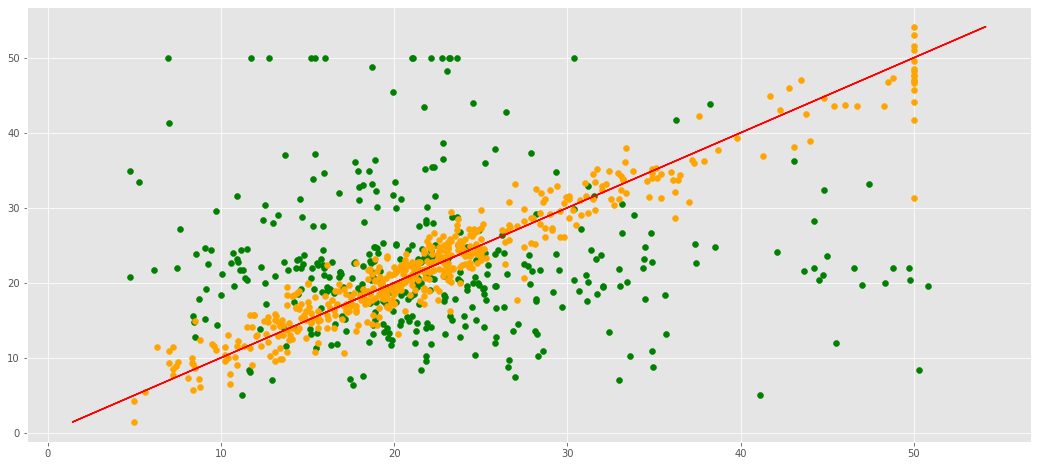

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)

pr_model = LinearRegression()
pr_model.fit(X_poly, Y)

y_pred = pr_model.predict(X_poly)
plt.figure(figsize = (18,8))
plt.scatter(y_train_predicted, y_train, c = "green")
plt.scatter(Y, y_pred, c="orange")
plt.plot(y_pred, lin2.predict(poly.fit_transform(X)), color = 'red')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#create_polynomial_regression_model(degree):
  #"Creates a polynomial regression model for the given degree"
  
poly_features = PolynomialFeatures(degree=2)
  
  # transforms the existing features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
  
  # predicting on training data-set
y_train_predicted = poly_model.predict(x_train_poly)
  
  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

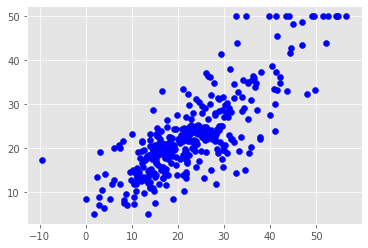

In [ ]:

plt.scatter(y_train_predicted, y_train, c = "blue")

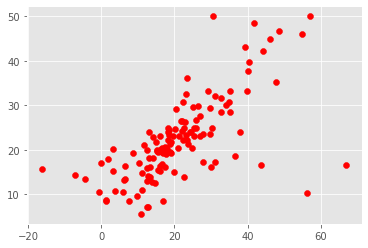

In [ ]:
plt.scatter(y_test_predict, y_test, c = 'red')

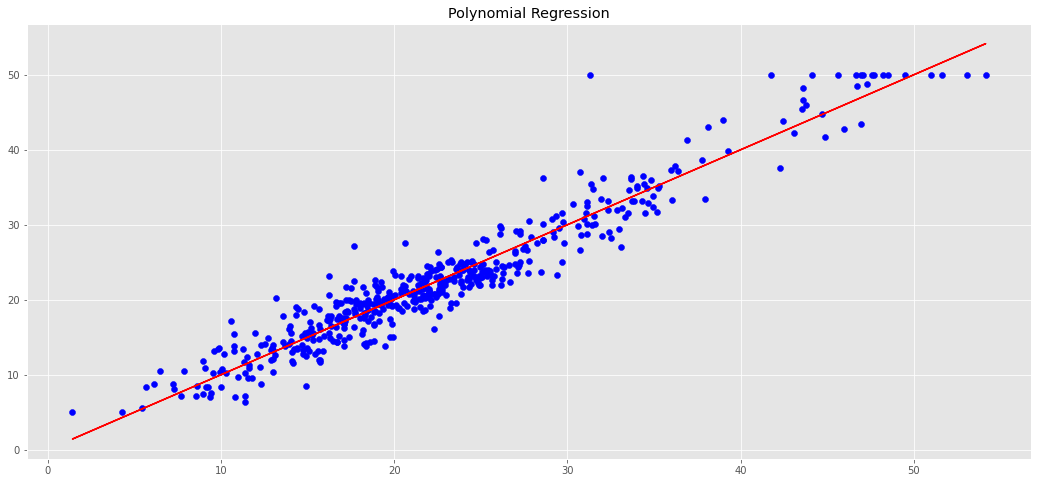

In [ ]:
# Visualising the Polynomial Regression results
plt.figure(figsize = (18,8))
plt.scatter(y_pred, Y, color = 'blue')
 
plt.plot(y_pred, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
 
plt.show()

# Correlation heatmap

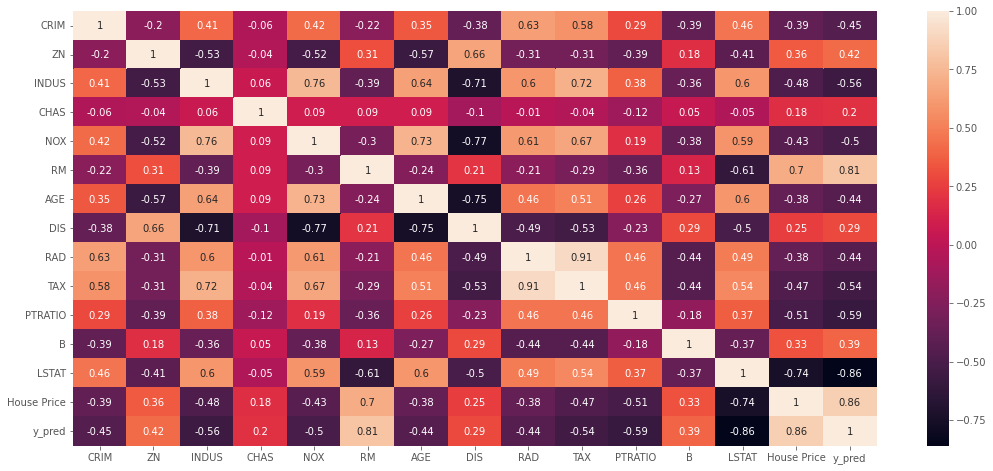

In [ ]:
import seaborn as sns
correlation_matrix = boston_pd.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (18,8))
sns.heatmap(data=correlation_matrix, annot=True)